# Coursera ML Exercise 1 -- linear regression

## Linear regression with one variable

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

导入数据，表头为None，添加列名，head()显示前五行数据

In [7]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [9]:
data.describe()


,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


数据可视化，figsize为图像大小

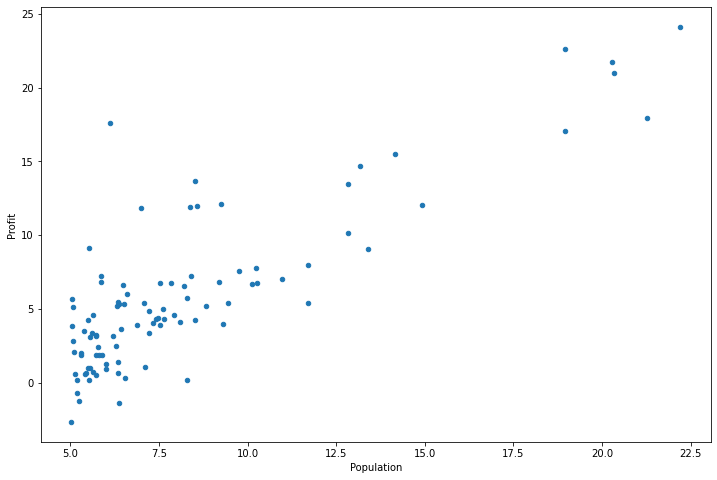

In [10]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度

In [11]:
data.insert(0, 'Ones', 1)  #第0列，值为1

In [14]:
cols = data.shape[1]  #获取列数
x = data.iloc[:,0:cols-1] #前两列
y = data.iloc[:,cols-1:cols] #最后一列


In [16]:
x.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [17]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


转化为numpy矩阵，并出示化theta

In [20]:
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))  #theta是一个(1,2)的矩阵

代价函数:![cost function](cost_function.jpg)
![h_theta_x](h_theta_x.jpg)

![h](h.png)

In [18]:
def computeCost(x, y, theta):
    inner = np.power(((x * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(x))

In [21]:
computeCost(x, y, theta)

32.072733877455676

## Batch gradient decent

![gradientDescent](gradientDescent.png)

![gradientDescent2](gradientDescent2.jpg)

In [28]:
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))  #临时保存theta值用 1x2矩阵
    parameters = int(theta.ravel().shape[1])  #ravel()将数组维度拉为一维，获取theta参数数量
    cost = np.zeros(iters)  #记录每次迭代后的代价

    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(x)) * np.sum(term))  #更新theta j

        theta = temp
        cost[i] = computeCost(x, y, theta)

    return theta, cost    

        
      


In [29]:
#初始化一些变量
alpha = 0.01
iters = 1000

In [30]:
g, cost = gradientDescent(x, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

新的cost值

In [31]:
computeCost(x, y, g)

4.515955503078914

绘制线性模型以及数据，直观地看出它的拟合

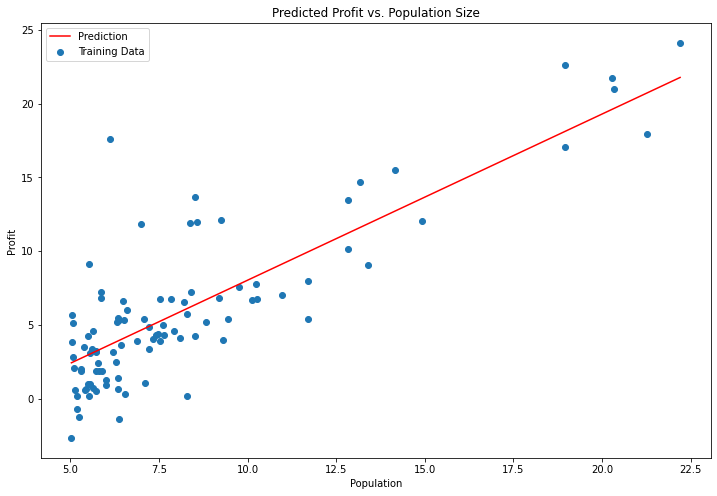

In [43]:
xpoint = np.linspace(data.Population.min(), data.Population.max(), 100)  #等差数列
f = g[0,0] + g[0,1] * xpoint

fig, ax = plt.subplots(figsize=(12,8))  #fig是一个总画布
ax.plot(xpoint, f, 'r', label='Prediction')  # 'r' red
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)  #图例 loc=2代表位于第二象限
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()


由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

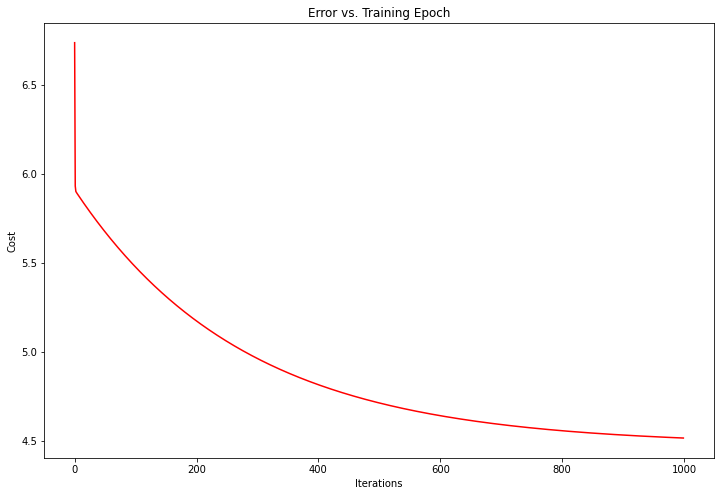

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')  #np.arange()函数返回一个有终点和起点的固定步长的排列
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## Multivariate linear regression

In [45]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Feature Scaling

In [46]:
data2 = (data2 - data2.mean()) / data2.std()  #std()标准差
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [47]:
data2.insert(0, 'Ones', 1)

cols = data2.shape[1]
x2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

x2 = np.matrix(x2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

g2, cost2 = gradientDescent(x2, y2, theta2, alpha, iters)

computeCost(x2, y2, g2)

0.1307033696077189

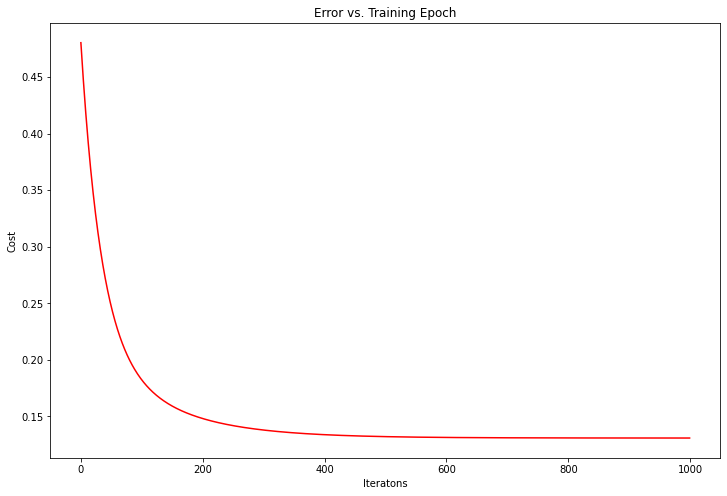

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iteratons')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### 直接使用scikit-learn的线性回归函数

In [49]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x, y)

C:\Users\李子豪\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\李子豪\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearRegression()

C:\Users\李子豪\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


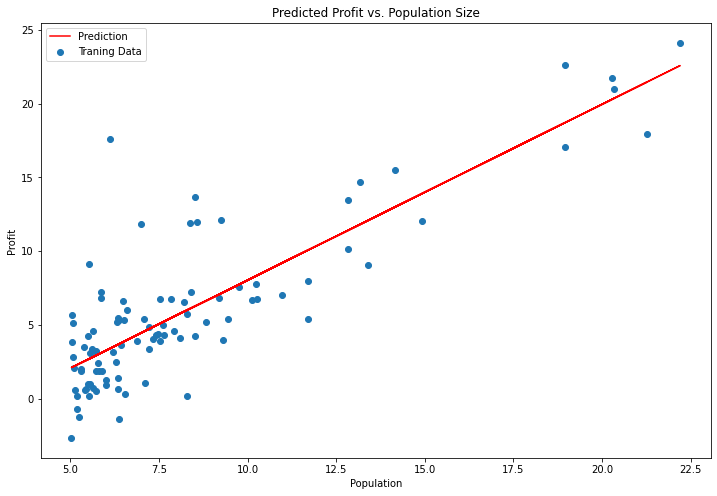

In [58]:
xpoint = np.array(x[:,1].A1)
# f.shape 97x1
# f = model.predict(x)的类型是ndarray
f = model.predict(x).flatten()
# flatten和ravel可以直接将array多维数组展平为一维数组，但是array并没有A1命令
# 对于matrix展平的同时保留原有维数和类型
# A1命令只针对matrix类型，直接展平为一维数组，而不是一维矩阵

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xpoint, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## Normal Equation (正规方程)
![normal_equation](normal_equation.jpg)

In [59]:
def normal_equation(x,y):
    theta = np.linalg.inv(x.T @ x) @ x.T @ y  # X.T@X等价于X.T.dot(X)
    return theta

In [61]:
final_theta2=normal_equation(x, y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])